In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import h5py

from astroML.utils import split_samples, completeness_contamination
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

import os

In [2]:
#loading data

f = h5py.File('sample_2e7_design_precessing_higherordermodes_3detectors.h5', 'r')
keys=f.keys()

#showing keys
list(f.keys())

['chi1x',
 'chi1y',
 'chi1z',
 'chi2x',
 'chi2y',
 'chi2z',
 'dec',
 'det',
 'iota',
 'mtot',
 'psi',
 'q',
 'ra',
 'snr',
 'z']

In [3]:
#creating data vectors with mass ratio,inclination, redshift and detectability 

q=np.array(f['q'])
z=np.array(f['z'])
inclination=np.array(f['iota'])
det=np.array(f['det'])

# removing nans from data

#making masks
mask1= q != np.nan
mask2= z != np.nan
mask3= inclination!=np.nan
#applying masks
q=q[mask1 & mask2 & mask3]
z=z[mask1 & mask2 & mask3]
inclination=inclination[mask1 & mask2 & mask3]
det=det[mask1 & mask2 & mask3]

In [4]:
#Splitting data in train and test

(X_train, X_test), (y_train, y_test) = split_samples(np.column_stack((q,z,inclination)), det,fractions=[0.75, 0.25])

In [5]:
#fast crossvalidation with a sub sample of the data to find the best maximum depth for the classifier

clf = DecisionTreeClassifier()

#range of depths

drange = np.arange(1,20)  

#cross validation using 10000 from the train set

grid = GridSearchCV(clf, param_grid={'max_depth': drange}, cv=10) #Complete
grid.fit(X_train[0:10000], y_train[0:10000])

best = grid.best_params_['max_depth']
print("best parameter choice:", best)

best parameter choice: 5


In [6]:
#fitting our data, this may take a while

clf=DecisionTreeClassifier(max_depth=best)
clf.fit(X_train[:],y_train)

os.system('afplay /System/Library/Sounds/Blow.aiff')

0

In [7]:
#predicting labels

y_pred=clf.predict(X_test[:])

#computing the completeness

completeness,contamination=completeness_contamination(y_pred, y_test)
print('completeness =',completeness)
print('contamination =', contamination)


completeness = 0.7801179397273943
contamination = 0.1800394468123538


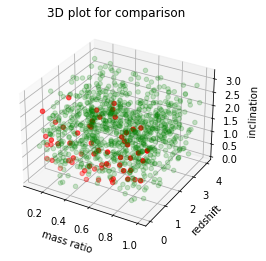

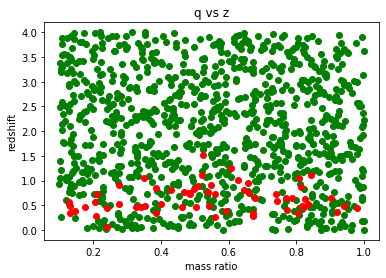

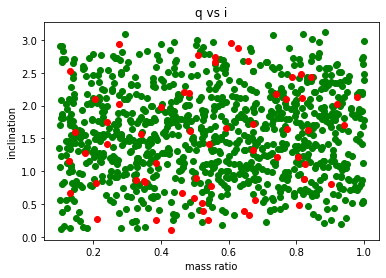

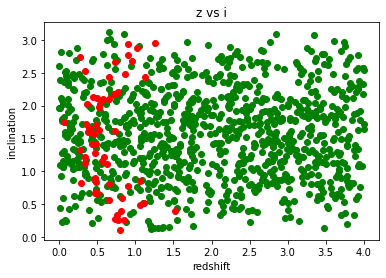

In [30]:
#Taking a subsample of the test set and looking at where the classification doesn't work well

mask_class = y_pred[0:1000]==y_test[0:1000]

#3D plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[0:1000,0][mask_class], X_test[0:1000,1][mask_class], X_test[0:1000,2][mask_class], c='green', marker='o',alpha=0.2)
ax.scatter(X_test[0:1000,0][~mask_class], X_test[0:1000,1][~mask_class], X_test[0:1000,2][~mask_class], c='red', marker='o',)


ax.set_xlabel('mass ratio')
ax.set_ylabel('redshift')
ax.set_zlabel('inclination')


plt.title('3D plot for comparison')
plt.show()

#2D plots

#mass ratio vs redshift

plt.scatter(X_test[0:1000,0][mask_class],X_test[0:1000,1][mask_class],color='green')
plt.scatter(X_test[0:1000,0][~mask_class],X_test[0:1000,1][~mask_class],color='red')

plt.xlabel('mass ratio')
plt.ylabel('redshift')
plt.title('q vs z')
plt.show()

#mass ratio vs inclination

plt.scatter(X_test[0:1000,0][mask_class],X_test[0:1000,2][mask_class],color='green')
plt.scatter(X_test[0:1000,0][~mask_class],X_test[0:1000,2][~mask_class],color='red')

plt.xlabel('mass ratio')
plt.ylabel('inclination')

plt.title('q vs i')
plt.show()

#redshift vs inclination

plt.scatter(X_test[0:1000,1][mask_class],X_test[0:1000,2][mask_class],color='green')
plt.scatter(X_test[0:1000,1][~mask_class],X_test[0:1000,2][~mask_class],color='red')

plt.xlabel('redshift')
plt.ylabel('inclination')

plt.title('z vs i')
plt.show()